Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

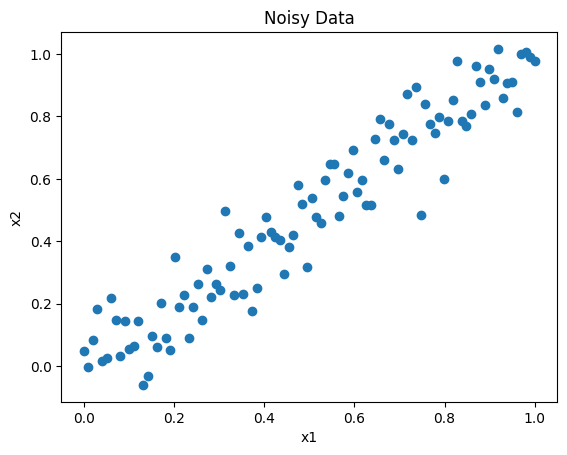

In [3]:
np.random.seed(42)
x1 = np.linspace(0,1,100)
noise = np.random.normal(0,0.1,100)
x2 = x1 + noise
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Noisy Data')
plt.show()


Eigenvalues: [0.17840573 0.00396217]
Explained variance ratio: [0.97827378 0.02172622]


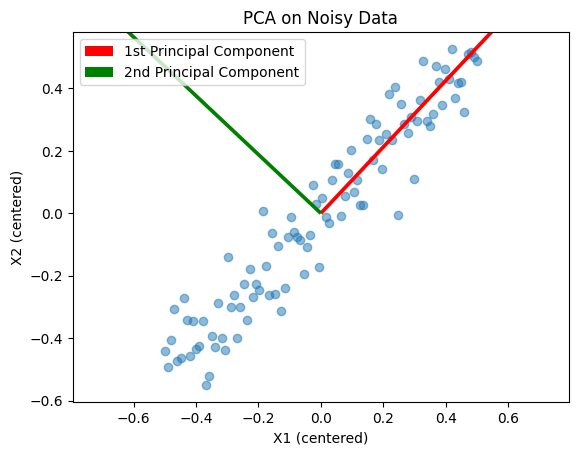

In [4]:
X = np.column_stack((x1,x2))

### Center the data
mu = X.mean(axis=0)
Xc = X - mu

### Compute the covariance matrix
C = np.cov(Xc, rowvar=False)

### Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(C)

### Sort eigenvalues and eigenvectors
order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

### Project data onto the first principal component
Z = Xc.dot(eigenvectors[:, 0])

### Explain variance ratio
explained_variance_ratio = eigenvalues / eigenvalues.sum()
print("Eigenvalues:", eigenvalues)
print("Explained variance ratio:", explained_variance_ratio)

### Plot original data and first principal component
plt.scatter(Xc[:, 0], Xc[:, 1], alpha=0.5)
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], 
           scale=eigenvalues[0]*5, color='r', label='1st Principal Component')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], 
           scale=eigenvalues[1]*5, color='g', label='2nd Principal Component')
plt.xlabel('X1 (centered)')
plt.ylabel('X2 (centered)')
plt.axis('equal')
plt.legend()
plt.title('PCA on Noisy Data')
plt.show()


k-means Clustering

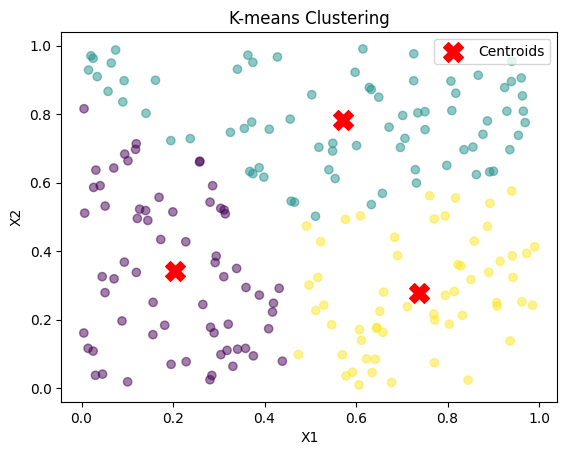

In [5]:
np.random.seed(42)
X = np.random.rand(200, 2)

### Initialize centroids randomly from the data points
def init_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

### Assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

### Update centroids as the mean of assigned points
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

### K-means algorithm
def kmeans(X, k, max_iters=100):
    centroids = init_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

k=3
centroids, labels = kmeans(X, k)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering')
plt.legend()
plt.show()